# **Decision Tree**
**Ghanshyam Kanojiya | T087**


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported ")


Libraries imported 


In [2]:
df = pd.read_csv('sonar.csv', header=None)
print("dataframe of SONAR dataset created")


dataframe of SONAR dataset created


In [3]:
df.head()


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
# SONAR dataset: 60 numeric features (0-59) and 1 label column (60)
# Label is 'R' (Rock) or 'M' (Mine)
df.shape


(208, 61)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# Checking for NULL values


In [6]:
df.isnull().sum()


0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [35]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
...,...,...,...,...,...,...,...,...
56,208.0,0.007820,0.005785,0.0003,0.003700,0.00595,0.010425,0.0355
57,208.0,0.007949,0.006470,0.0003,0.003600,0.00580,0.010350,0.0440
58,208.0,0.007941,0.006181,0.0001,0.003675,0.00640,0.010325,0.0364
59,208.0,0.006507,0.005031,0.0006,0.003100,0.00530,0.008525,0.0439


# Encoding label column (R/M) to numeric


In [9]:
from sklearn.preprocessing import LabelEncoder


In [10]:
le = LabelEncoder()


In [11]:
# Last column (60) is the target label
df[60] = le.fit_transform(df[60])  # R/M -> 0/1


In [12]:
df.head()


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [13]:
# X- Features  y- Label
X = df.iloc[:, 0:60]   # 60 numeric features
y = df[60]             # Encoded label


# Doing train_test_split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


# Training the model


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

# Checking accuracy of testing dataset

In [16]:
from sklearn.metrics import accuracy_score
import math
predictions_test=clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, predictions_test)*100)

Accuracy :  77.77777777777779


# Checking accuracy of training dataset

In [17]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

1.0

# Visualizing our final decision tree

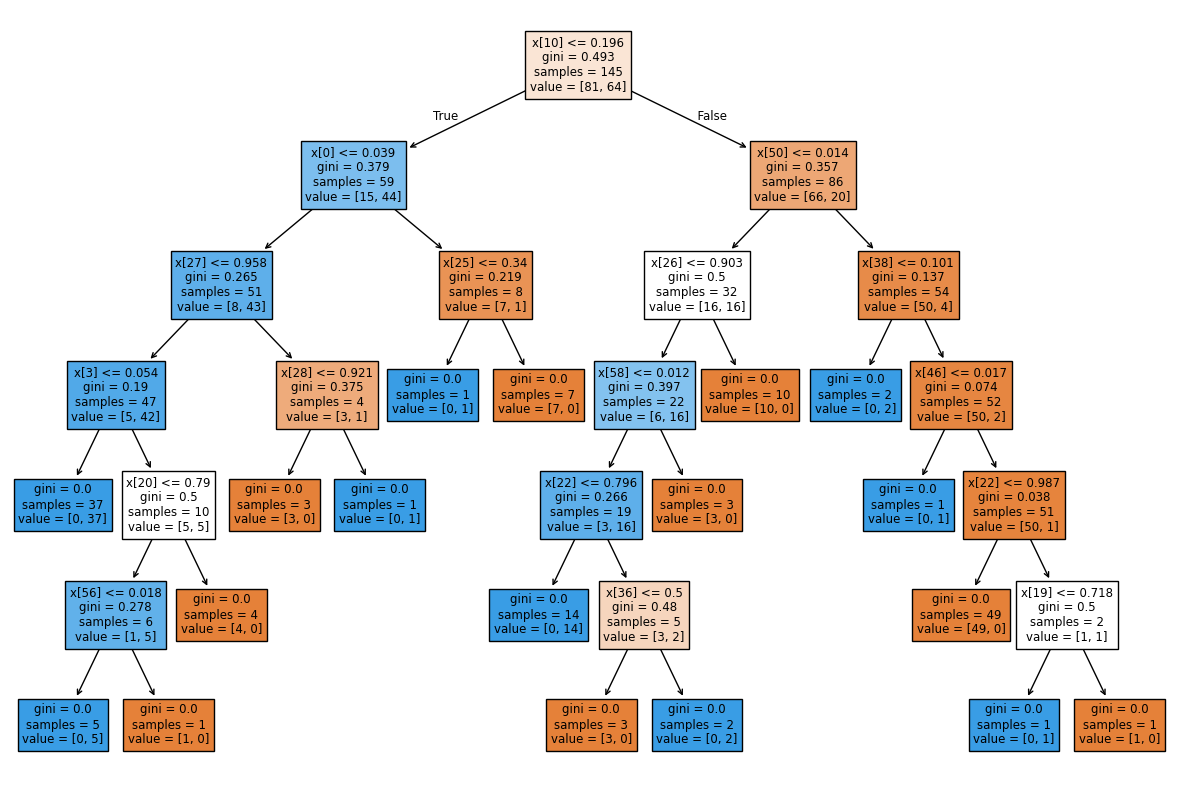

In [18]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

# Evaluating our test dataset

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions_test))
print(confusion_matrix(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.79      0.79      0.79        33

    accuracy                           0.78        63
   macro avg       0.78      0.78      0.78        63
weighted avg       0.78      0.78      0.78        63

[[23  7]
 [ 7 26]]


# Evaluating our training dataset

In [20]:
print(classification_report(y_train,predictions_train))
print(confusion_matrix(y_train,predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        64

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145

[[81  0]
 [ 0 64]]


# Finding false positive rate and true positive rate

In [21]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
dt_probs = clf.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,dt_probs)
print("FPR :",fpr_dt)
print("TPR :",tpr_dt)
print("Threshold :",thresholds_dt)


FPR : [0.         0.23333333 1.        ]
TPR : [0.         0.78787879 1.        ]
Threshold : [inf  1.  0.]


# Plotting *ROC* curve for our Decision Tree

In [22]:
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

0.7772727272727272

In [23]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

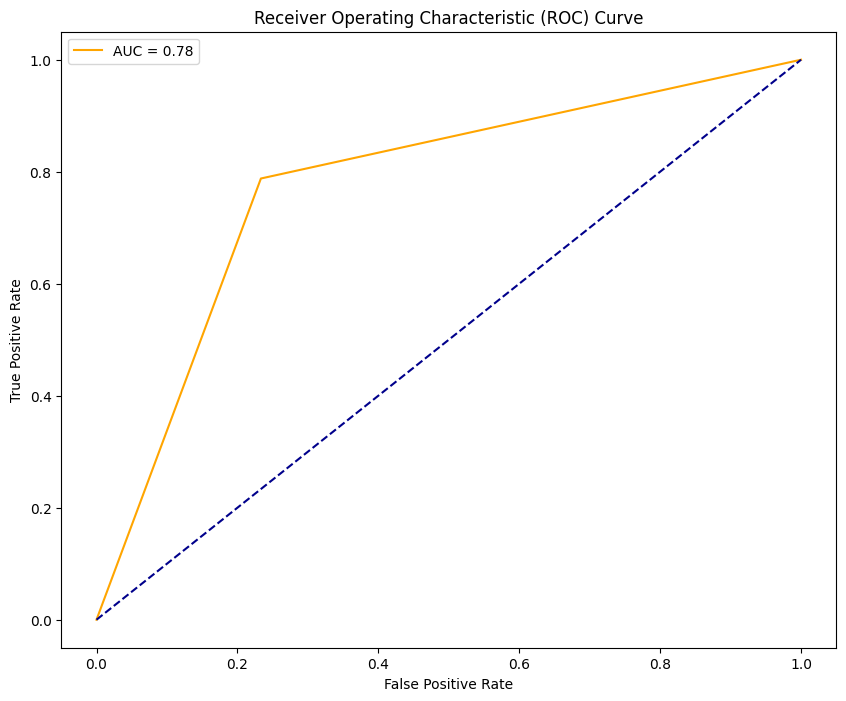

In [24]:
plot_roc_curve(fpr_dt,tpr_dt)

# Pruning of our decision tree

In [25]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Visualizing alpha w.r.t impurity of leaves

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

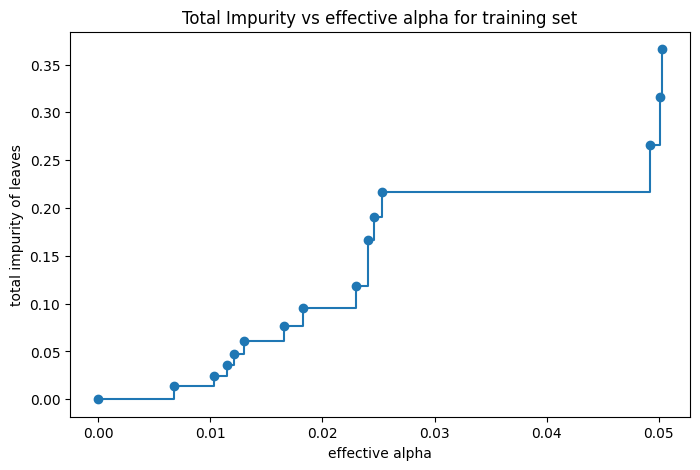

In [26]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [27]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12712339656086358


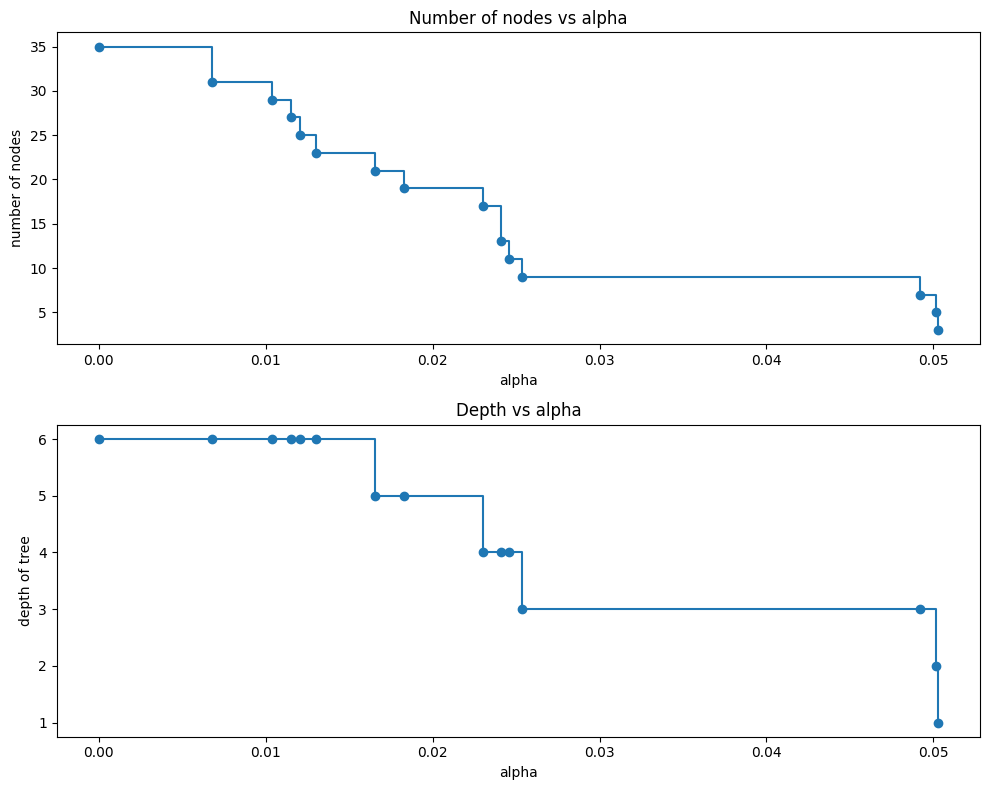

In [28]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

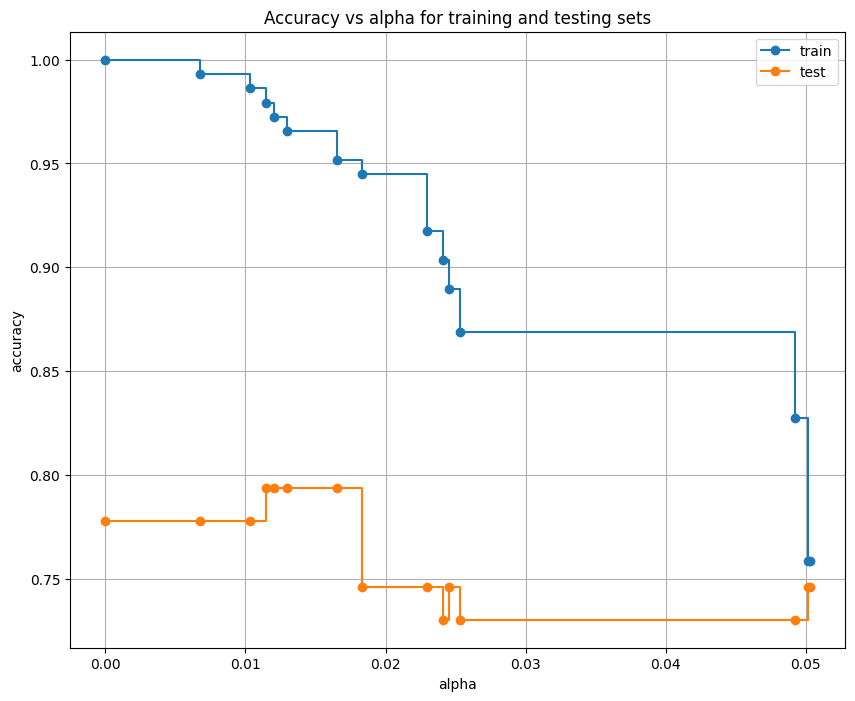

In [29]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

# Accuracy after pruning

In [30]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

### Accuracy of test dataset

In [31]:
from sklearn.metrics import accuracy_score
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.7936507936507936

### Accuracy of training dataset

In [32]:
pred_1 = clf.predict(X_train)
accuracy_score(y_train,pred_1)

0.9655172413793104

# Visualizing after pruning

[Text(0.5, 0.9285714285714286, 'x[10] <= 0.196\ngini = 0.493\nsamples = 145\nvalue = [81, 64]'),
 Text(0.26666666666666666, 0.7857142857142857, 'x[0] <= 0.039\ngini = 0.379\nsamples = 59\nvalue = [15, 44]'),
 Text(0.3833333333333333, 0.8571428571428572, 'True  '),
 Text(0.2, 0.6428571428571429, 'x[27] <= 0.958\ngini = 0.265\nsamples = 51\nvalue = [8, 43]'),
 Text(0.13333333333333333, 0.5, 'x[3] <= 0.054\ngini = 0.19\nsamples = 47\nvalue = [5, 42]'),
 Text(0.06666666666666667, 0.35714285714285715, 'gini = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(0.2, 0.35714285714285715, 'x[20] <= 0.79\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.13333333333333333, 0.21428571428571427, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.26666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.26666666666666666, 0.5, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.3333333333333333, 0.6428571428571429, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Tex

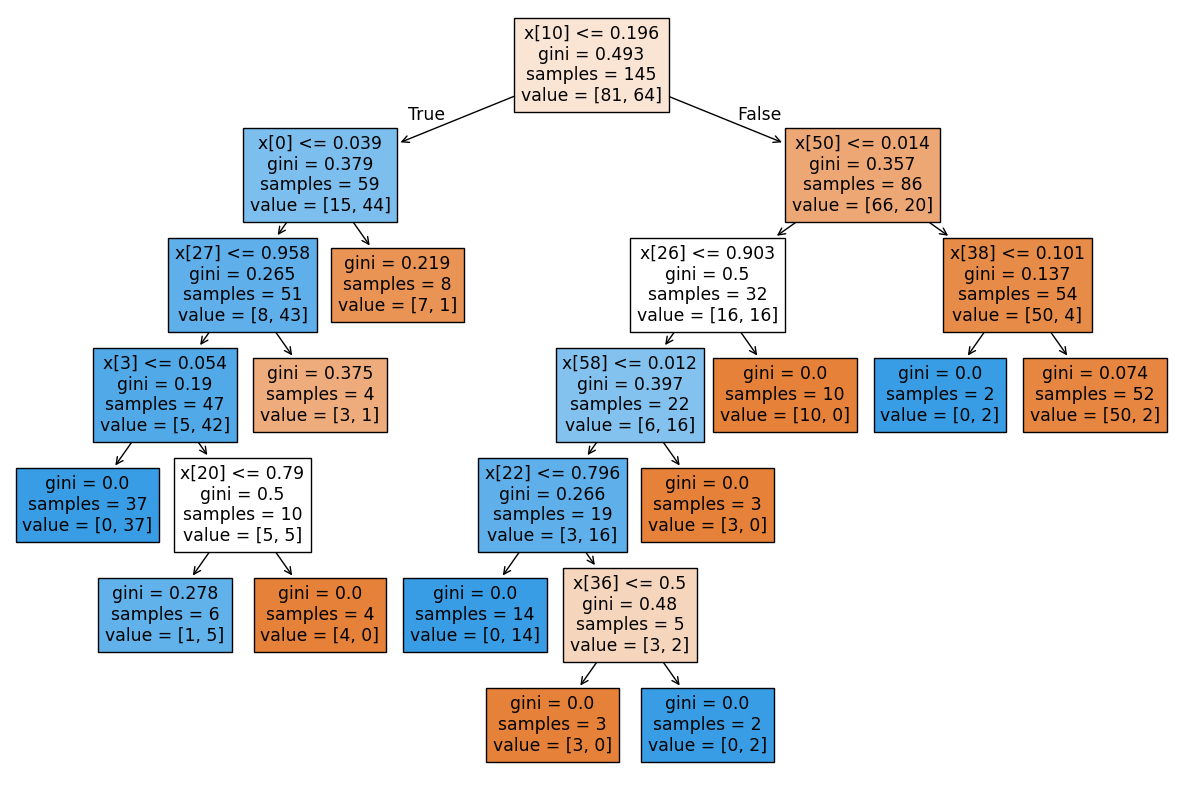

In [33]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)